In [2]:
# Data Analytics II  logistic regression
import pandas as pd

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [6]:
x=df.drop(['User ID','Purchased'],axis=1)
y=df['Purchased']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [9]:
from sklearn.linear_model import LogisticRegression
model_1=LogisticRegression()
model_1.fit(x_train,y_train)

LogisticRegression()

In [10]:
prediction_1=model_1.predict(x_test)
prediction_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [11]:
from sklearn.metrics import accuracy_score
acc_1=accuracy_score(y_test,prediction_1)
acc_1

0.6333333333333333

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_2=sc.fit_transform(x_train)
x_test_2=sc.fit_transform(x_test)

In [14]:
model_2=LogisticRegression()
model_2.fit(x_train_2,y_train)
prediction_2=model_2.predict(x_test_2)

In [15]:
acc_2=accuracy_score(y_test,prediction_2)
acc_2

0.85

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [17]:
cm=confusion_matrix(y_test,prediction_2)
cm

array([[70,  6],
       [12, 32]], dtype=int64)

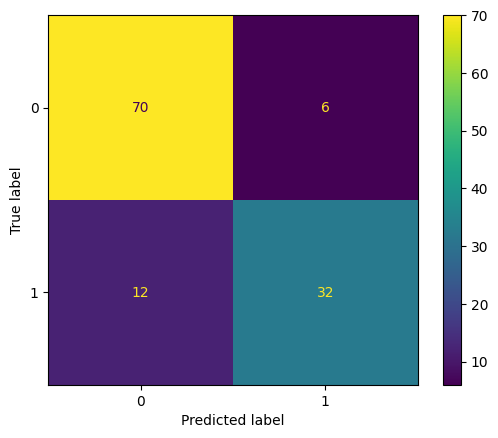

In [18]:
ConfusionMatrixDisplay(cm).plot()

In [33]:
# TP = cm[0, 0]
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
# TN = cm[1, 1]
TN = cm[0, 0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.85

In [34]:
error_rate = (FP + FN) / (TP + TN + FP + FN)
error_rate

0.15

In [35]:
precision = TP / (TP + FP)
precision

0.8421052631578947

In [36]:
recall = TP / (TP + FN)
recall

0.7272727272727273

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_2))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89        76
           1       0.84      0.73      0.78        44

    accuracy                           0.85       120
   macro avg       0.85      0.82      0.83       120
weighted avg       0.85      0.85      0.85       120

